**Up-and-Out Call Option Pricing Using Monte Carlo Simulation**

A class of barrier options where the contract becomes void if the underlying asset price breaches a specified barrier. This notebook demonstrates Monte Carlo pricing of up-and-out call options using Geometric Brownian Motion to simulate stochastic price paths and evaluates expected discounted payoffs under the risk-neutral measure. It explores the effect of volatility on option price across different barrier levels, illustrating stochastic modeling, path-dependent payoffs, simulation-based convergence, nonlinear payoff structures and filtering techniques for barrier events.

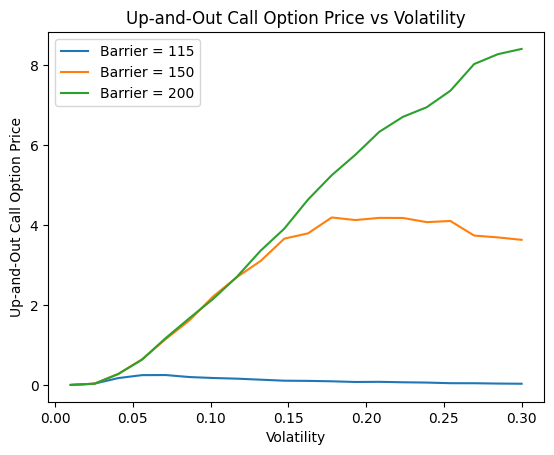

In [1]:
# European Barrier Option: Up-and-Out Call
# This notebook implements a Monte Carlo simulation to price 
# up-and-out call options. It explores sensitivity to volatility
# for different barrier levels, demonstrating stochastic modeling
# and option payoff filtering.

import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo simulation for underlying asset paths
def mc_sim(s0, k, volatility, maturity, r, num_sim, t_s):
    """
    Simulates paths of the underlying asset using Geometric Brownian Motion.
    
    Parameters:
        s0 : float - initial stock price
        k : float - strike price (used for consistency)
        volatility : float - annualized volatility
        maturity : float - time to maturity (years)
        r : float - risk-free interest rate
        num_sim : int - number of Monte Carlo simulations
        t_s : int - number of time steps per path
    
    Returns:
        sim_matrix : np.ndarray - simulated asset paths (num_sim x t_s)
    """
    dt = maturity / t_s
    sim_matrix = np.zeros((num_sim, t_s))
    
    for i in range(num_sim):
        sim_matrix[i, 0] = s0
        for j in range(1, t_s):
            shift = (r - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * np.random.randn()
            sim_matrix[i, j] = sim_matrix[i, j-1] * np.exp(shift)
    
    return sim_matrix

# Up-and-Out Call Option pricing
def up_and_out_call_price(s0, k, volatility, maturity, r, num_sim, t_s, barrier_price):
    """
    Computes the Monte Carlo estimate for an up-and-out call option.
    
    Paths hitting the barrier are discarded (option knocked out).
    """
    total_payoff = []
    mc = mc_sim(s0, k, volatility, maturity, r, num_sim, t_s)
    
    for i in range(num_sim):
        if max(mc[i]) >= barrier_price:  # Knocked out
            continue
        total_payoff.append(max(0, mc[i][-1] - k) * np.exp(-r * maturity))
    
    return np.mean(total_payoff)


# Parameters
s0 = 100
k = 110
t_s = 100
maturity = 1
r = 0.05
num_sim = 10000

# Sensitivity Analysis: Option price vs. Volatility for different barriers
barriers = [115, 150, 200]

for barrier_price in barriers:
    vol_range = np.linspace(0.01, 0.3, 20)
    prices = [up_and_out_call_price(s0, k, vol, maturity, r, num_sim, t_s, barrier_price) for vol in vol_range]
    
    plt.plot(vol_range, prices, label=f'Barrier = {barrier_price}')

plt.xlabel("Volatility")
plt.ylabel("Up-and-Out Call Option Price")
plt.title("Up-and-Out Call Option Price vs Volatility")
plt.legend()
plt.show()
